# Boom Bikes sharing

<b>Problem Statement<b>:
    
    To come up with a prediction of demand for shared bikes.A bike-sharing system is a service in which bikes 
    are made available for shared use to individuals on a short term basis for a price or free.

    In this case, Boom Bikes aspires to understand the demand for shared bikes among the people after the 
    ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves 
    to cater to the people's needs once the situation gets better all around and stand 
    out from other service providers and make huge profits 
    
<b>Business Goal<b>:

    The model to identify key features contributing significantly towards explaining the demand of the shared bikes. 
    So that this can be imbibed by the Boom bikes to enhance their business. 
    Further, the model will be a good way for management to understand the demand dynamics of a new market

For this use case we are using day data for all bike rentals for the year 2018 and 2019 and a data dictionary.


<b>Steps involved in Multiple Linear Regression<b>
    
    Step 1: Read the data from the source 
    Step 2: Understand The data 
    Step 3: Clean up the data, drop unwanted columns, check for duplicates etc 
    Step 4: EDA 
    Step 5: Map all categorical variables to Dummy variables 
    Step 6: Train and test split 
    Step 7: Scaling 
    Step 8: Feature Selection 
    Step 9: Evaluate Test set

In [1140]:
# Supress Warnings and import all required libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from scipy.stats import norm

In [1141]:
# Importing data for the use case
df = pd.read_csv('G://My Drive//Education//Master//artifacts//upgrad//bike sharing app assignment//data//day.csv')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


In [1142]:
# printing the shape and first 5 rows of the data
print(df.shape)

df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1143]:
# describing the data to fetch important params around data analaysis
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1144]:
#drop  instant, dteday, casual, registered as they are not effiective for our data analysis
# cnt is the target variable

df.drop(['instant','casual','registered','dteday'], axis=1, inplace=True)

print(df.shape)

(730, 12)


In [1145]:
#check missing values in data column and row wise 

#check the nulls row wise
null_rows = df.isnull().all(axis=1).sum()
print('Count of empty Rows: {}'.format(null_rows))
# Review: There are 0 rows with missing values

#check the nulls column wise
null_columns = df.isnull().all(axis=0).sum()
print('Count of Columns with missing values: {}'.format(null_columns))
#Review: There are 0 columns with missing values

Count of empty Rows: 0
Count of Columns with missing values: 0


In [1146]:
#map variable to original values : sesaon 

print(df.season.unique())

seasons = {1:'spring', 2:'summer',3:'fall', 4:'winter'}

df['season'] = df['season'].map(seasons)

print(df.season.unique())

df.head()

[1 2 3 4]
['spring' 'summer' 'fall' 'winter']


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1147]:
#map variable to original values : mnth 

print(df.mnth.unique())

seasons = {
1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr',
5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',
9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'
}

df['mnth'] = df['mnth'].map(seasons)

print(df.mnth.unique())

df.head()

[ 1  2  3  4  5  6  7  8  9 10 11 12]
['jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'oct' 'nov' 'dec']


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1148]:
#map variable to original values : weekday
print(df.weekday.unique())

days = {5:'Sun',6:'Mon',0:'Tues',1:'Weds',2:'Thurs',3:'Fri',4:'Sat'}

df['weekday'] = df['weekday'].apply(lambda x: days[x])

print(df.weekday.unique())
df.head()

[6 0 1 2 3 4 5]
['Mon' 'Tues' 'Weds' 'Thurs' 'Fri' 'Sat' 'Sun']


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Weds,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1149]:
#map variable to original values : weathersit
print(df.weathersit.unique())

days = {1:'clear',2:'mist',3:'light snow',4:'heavy rain'}

df['weathersit'] = df['weathersit'].apply(lambda x: days[x])

print(df.weathersit.unique())
df.head()

[2 1 3]
['mist' 'clear' 'light snow']


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Weds,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Analysis

In [1150]:
#Generic function to generate box plot out of a given variables with cnt
def generate_box_plot_by_var_cnt(df,x_col,y_col):
    sns.boxplot(x=x_col, y=y_col, data=df)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels,bbox_to_anchor=(1.05, 0.5), loc='center left')
    plt.show()

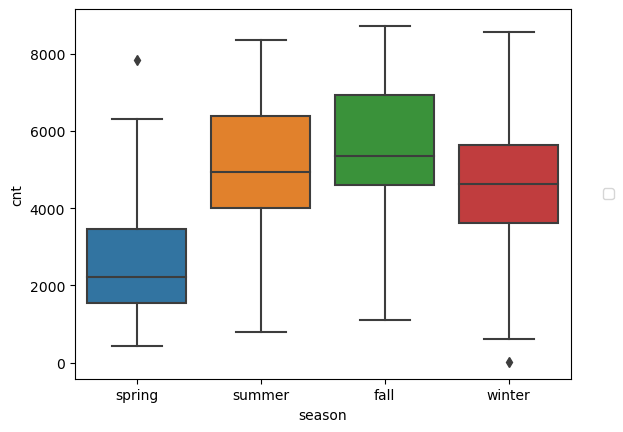

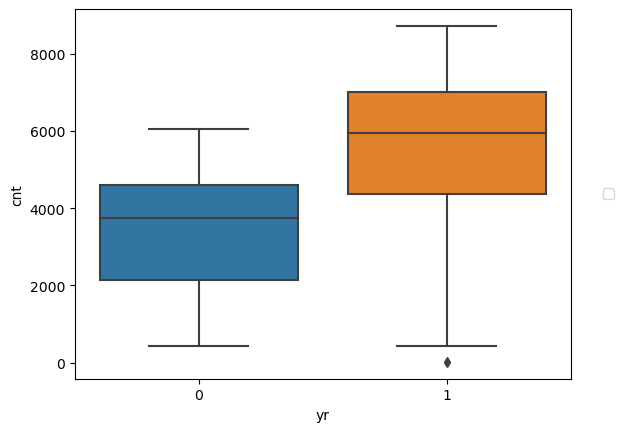

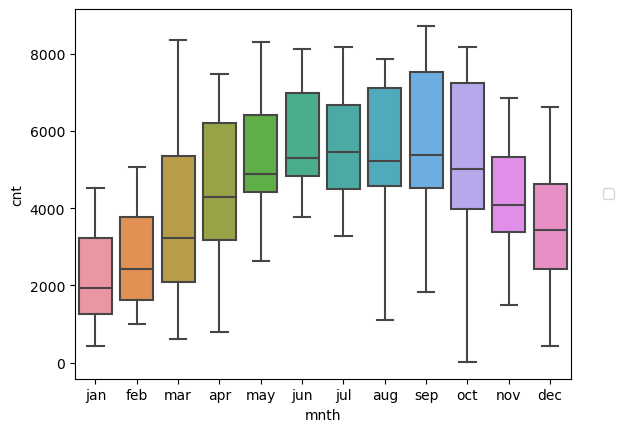

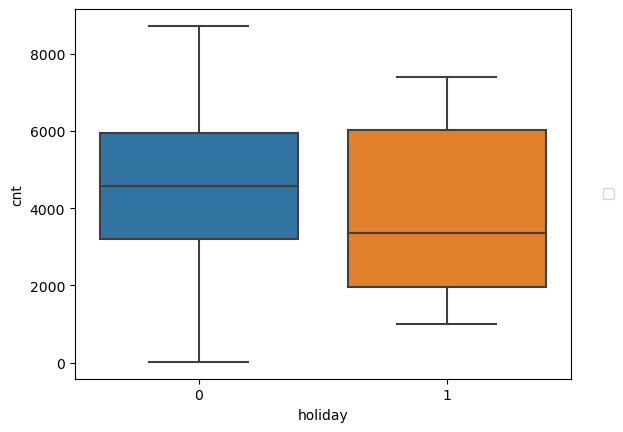

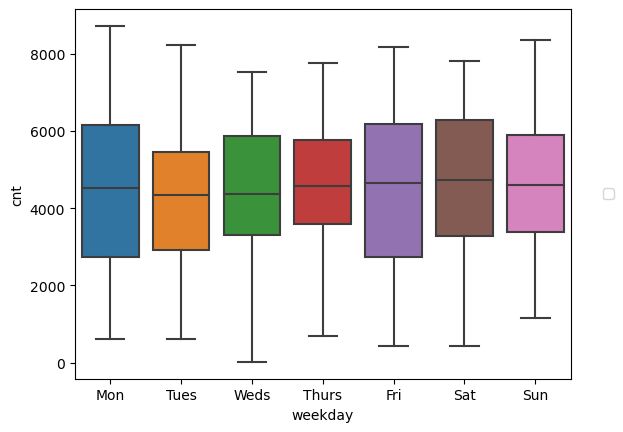

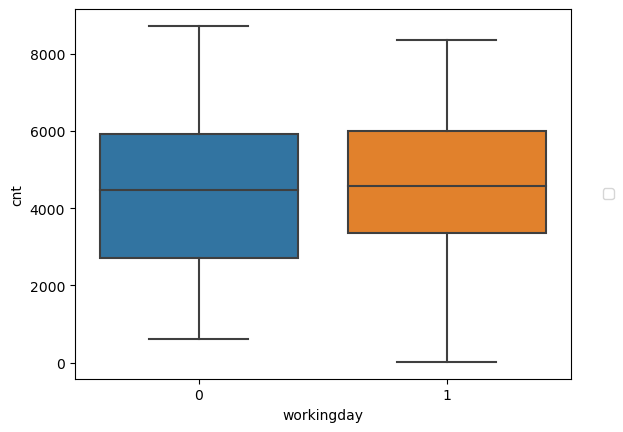

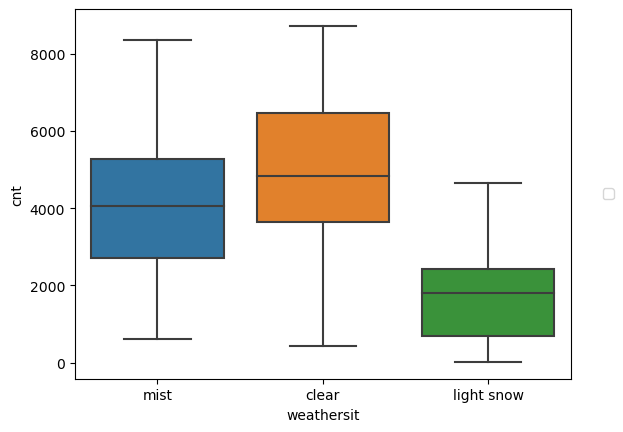

[None, None, None, None, None, None, None]

In [1151]:
#create box plot to see outliers
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
[generate_box_plot_by_var_cnt(df=df,x_col=x,y_col='cnt') for x in cat_cols]

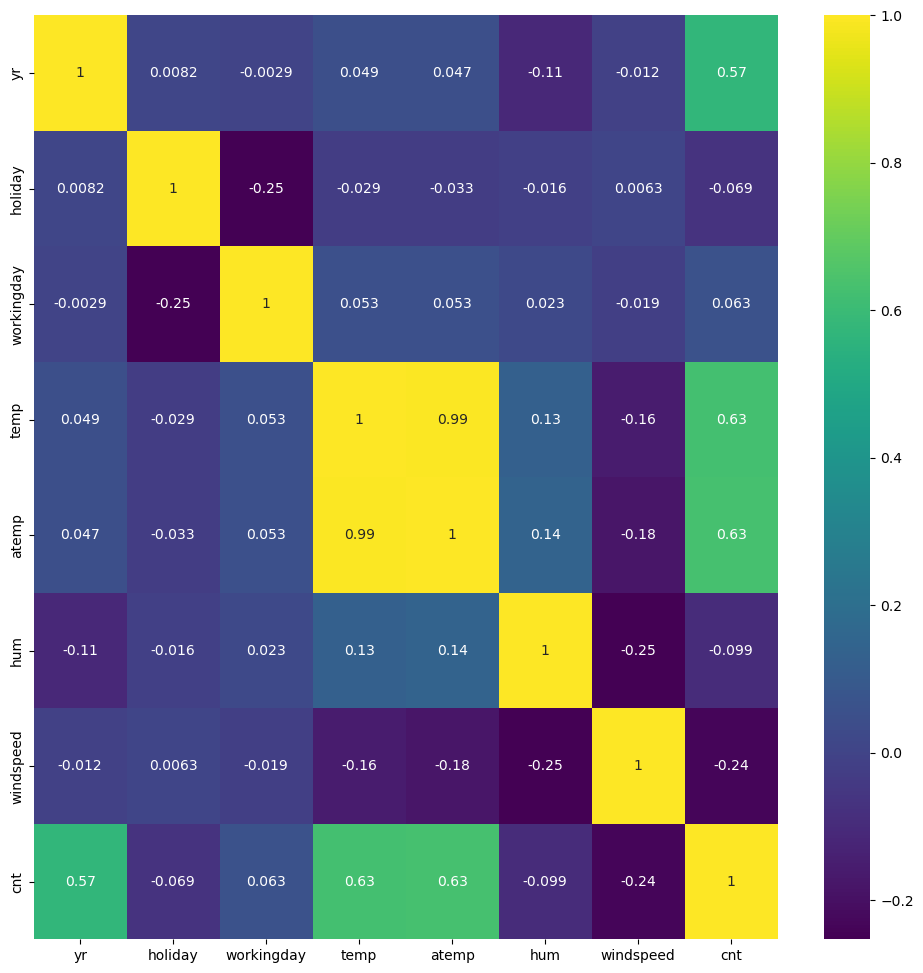

In [1152]:
# Correlaration matrix for all the numeric variables
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

## create dummies

In [1153]:
# drop the first column from df using 'drop_first = True'
seasons = pd.get_dummies(df['season'], drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, seasons], axis = 1)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,Weds,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [1154]:
#drop the first column from df using 'drop_first = True'
mnths = pd.get_dummies(df['mnth'], drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, mnths], axis = 1)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,spring,0,jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,Weds,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1155]:
# drop the first column from df using 'drop_first = True'
weekdays = pd.get_dummies(df['weekday'], drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, weekdays], axis = 1)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Weds
0,spring,0,jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,spring,0,jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,spring,0,jan,0,Weds,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,0,jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1156]:
# drop the first column from status df using 'drop_first = True'
weathersits = pd.get_dummies(df['weathersit'], drop_first = True)

# Add the results to the original dataframe
df = pd.concat([df, weathersits], axis = 1)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Weds,light snow,mist
0,spring,0,jan,0,Mon,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,Tues,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,Weds,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1157]:
# Dropping the original catagorical variables : season, weathersit, mnth, weekday and dteday as we have created the dummies and derived necessary variables
print(df.shape)

df.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1, inplace = True)

print(df.shape)
df.head()


(730, 34)
(730, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Weds,light snow,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1158]:
# dropping temp as temp and atemp are both highly correlated , having them together would impact our model training.
print(df.shape)

df.drop(['temp'], axis = 1, inplace = True)

print(df.shape)
df.head()

(730, 30)
(730, 29)


,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Weds,light snow,mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [1159]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features using MinMax scaling

In [1160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1161]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['cnt', 'atemp','hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Weds,light snow,mist
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [1162]:
df_train[num_vars].describe()

,cnt,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.513620,0.512989,0.650369,0.320768
std,0.224593,0.212385,0.145882,0.169797
min,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.332086,0.538643,0.199179
50%,0.518638,0.526811,0.653714,0.296763
75%,0.684710,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [1163]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

Leveraging **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE : Recursive feature elimination

In [1164]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [1165]:
# Running the RFE with the output number of the variable equal to 15 and 1 (step) variable at a time
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

In [1166]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 7),
 ('mar', False, 14),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 11),
 ('Thurs', False, 10),
 ('Tues', False, 8),
 ('Weds', False, 9),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [1167]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'jan', 'jul', 'nov', 'sep', 'Mon', 'light snow', 'mist'],
      dtype='object')

In [1168]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'Sat',
       'Sun', 'Thurs', 'Tues', 'Weds'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [1169]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1170]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1171]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [1172]:
#Summary of the linear model
print(lm.summary())

# review : we see that the p values for "Mon" > 0.05 indicating insignificance in the model training

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          9.67e-187
Time:                        08:15:08   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3662      0.032     11.425      0.0

In [1173]:
#dropping "Mon" feature since it has p value > 0.05 as it is not a significant variable
X_train_rfe = X_train_rfe.drop(['Mon'], axis=1)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.58e-187
Time:                        08:15:08   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3704      0.032     11.578      0.0

In [1174]:
#dropping the const before calculating VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# review : we observe that VIP of hum is very high and > 10 , hence we need to drop it to attain a optimal model

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,winter,2.93
5,spring,2.89
13,mist,2.26
0,yr,2.06
10,nov,1.82
8,jan,1.75
7,dec,1.54


In [1175]:
# dropping "hum" feature
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

# review : we see the Prob (F-statistic) < 0.05 and all the p values are below 0.05 which indicates the model is a good fit

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.95e-185
Time:                        08:15:08   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2931      0.026     11.396      0.0

In [1176]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# review : now we see VIFs for all the features < 10 , hence we conclude that the model is optimal

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,winter,2.55
4,spring,2.35
0,yr,2.06
9,nov,1.80
7,jan,1.65
12,mist,1.53
6,dec,1.46
8,jul,1.35


## Residual Analysis of the train data

check if the error terms are normally distributed

In [1177]:
y_train_price = lm.predict(X_train_rfe)

In [1178]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

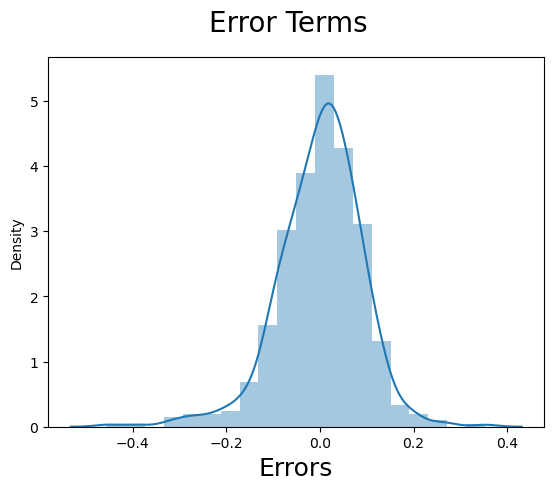

In [1179]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

# review : error terms are normally distributed which is one of the major point while selecting linear regression and indicating model is a good fit

In [1180]:
#### Applying the scaling on the test sets

In [1181]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Mon,Sat,Sun,Thurs,Tues,Weds,light snow,mist
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [1182]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1183]:
# Make predictions using the model.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1184]:
y_pred = lm.predict(X_test_new)

## Model Evaluation


Text(0, 0.5, 'y_pred')

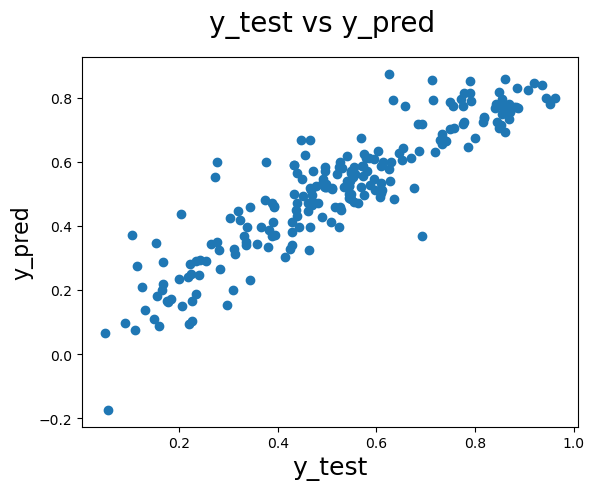

In [1185]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                         

# review : y test and y pred are closely correlated indicating model is a good fit

In [1186]:
#calculate the R-squared score on the test set.

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred).round(3)

r2

0.818

In [1187]:
# formula : adjusted_R2 = 1-((1-r2)(n-1)/n-p-1) p = number of predictors n = sample size

n = int(X_test_new.shape[0])
print("The sample size {}".format(n))
p = int(X_test_new.shape[1])
print("The p value {}".format(p))

r_adj_test = 1-(1-r2)*(n-1)/(n-p-1)

r_adj_test=r_adj_test.round(3)

The sample size 219
The p value 14


In [1188]:
# reivew : final model has R-squared (adj) = 0.832 and we got on test set as 0.806
# which is slghtly lesser than the former, we can conclude that model is a good fit

print("R2 and R2 adjusted for train set is {} and {}".format(0.836,0.832))
print("R2 and R2 adjusted for test set is {} and {}".format(r2,r_adj_test ))

R2 and R2 adjusted for train set is 0.836 and 0.832
R2 and R2 adjusted for test set is 0.818 and 0.806


<p><b>Boom Bikes could consider the following variables to increase the business</b></p>

Most critical: <p>
<b>atemp<p>
<p>light snow<p>
<p>yr<p> 

       
    
Others : 
windspeed, holiday, spring, winter, dec, jan, jul, nov, sep and mist      
